<a href="https://colab.research.google.com/github/MansurCompAI/DataScience_mohirdev/blob/master/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 6-MODUL. Deep Learning 
## II-qism

# Loyiha va uni mahsulotga aylantirish

#### Kutubxonalarni o'rnatib olamiz

Bizga kerak bo'ladi:

 - `fastai==2.5.3` versiyasi
 - `torch==1.10.0+cu111` versiyasi 

Eslatma: Kurs yozilgan vaqtda yuqoridagi versiyalardan foydalanilgan. 

In [ ]:
# !pip install fastai==2.5.3

 Kutubxonalarni tekshirish

In [2]:
# kutubxonalarni yuklab olish
import torch
import fastai

# versiyalarini tekshirish
print(torch.__version__)
print(fastai.__version__)

1.10.0+cu111
2.5.3


# Dataset

Dataset yuklab olish uchun `Google`ning  [`Open Images Dataset v4`](https://storage.googleapis.com/openimages/web/index.html) ochiq ma'lumotlaridan foydalanamiz. Bu dataset [`600`](https://storage.googleapis.com/openimages/2018_04/bbox_labels_600_hierarchy_visualizer/circle.html) ta sinfdan(class) iborat `1.7 mln` rasmni o'z ichiga. 



*** Bu rasmlarni yuklab olish uchun `OIDv4_ToolKit` dan foydalanamiz. (https://github.com/EscVM/OIDv4_ToolKit)

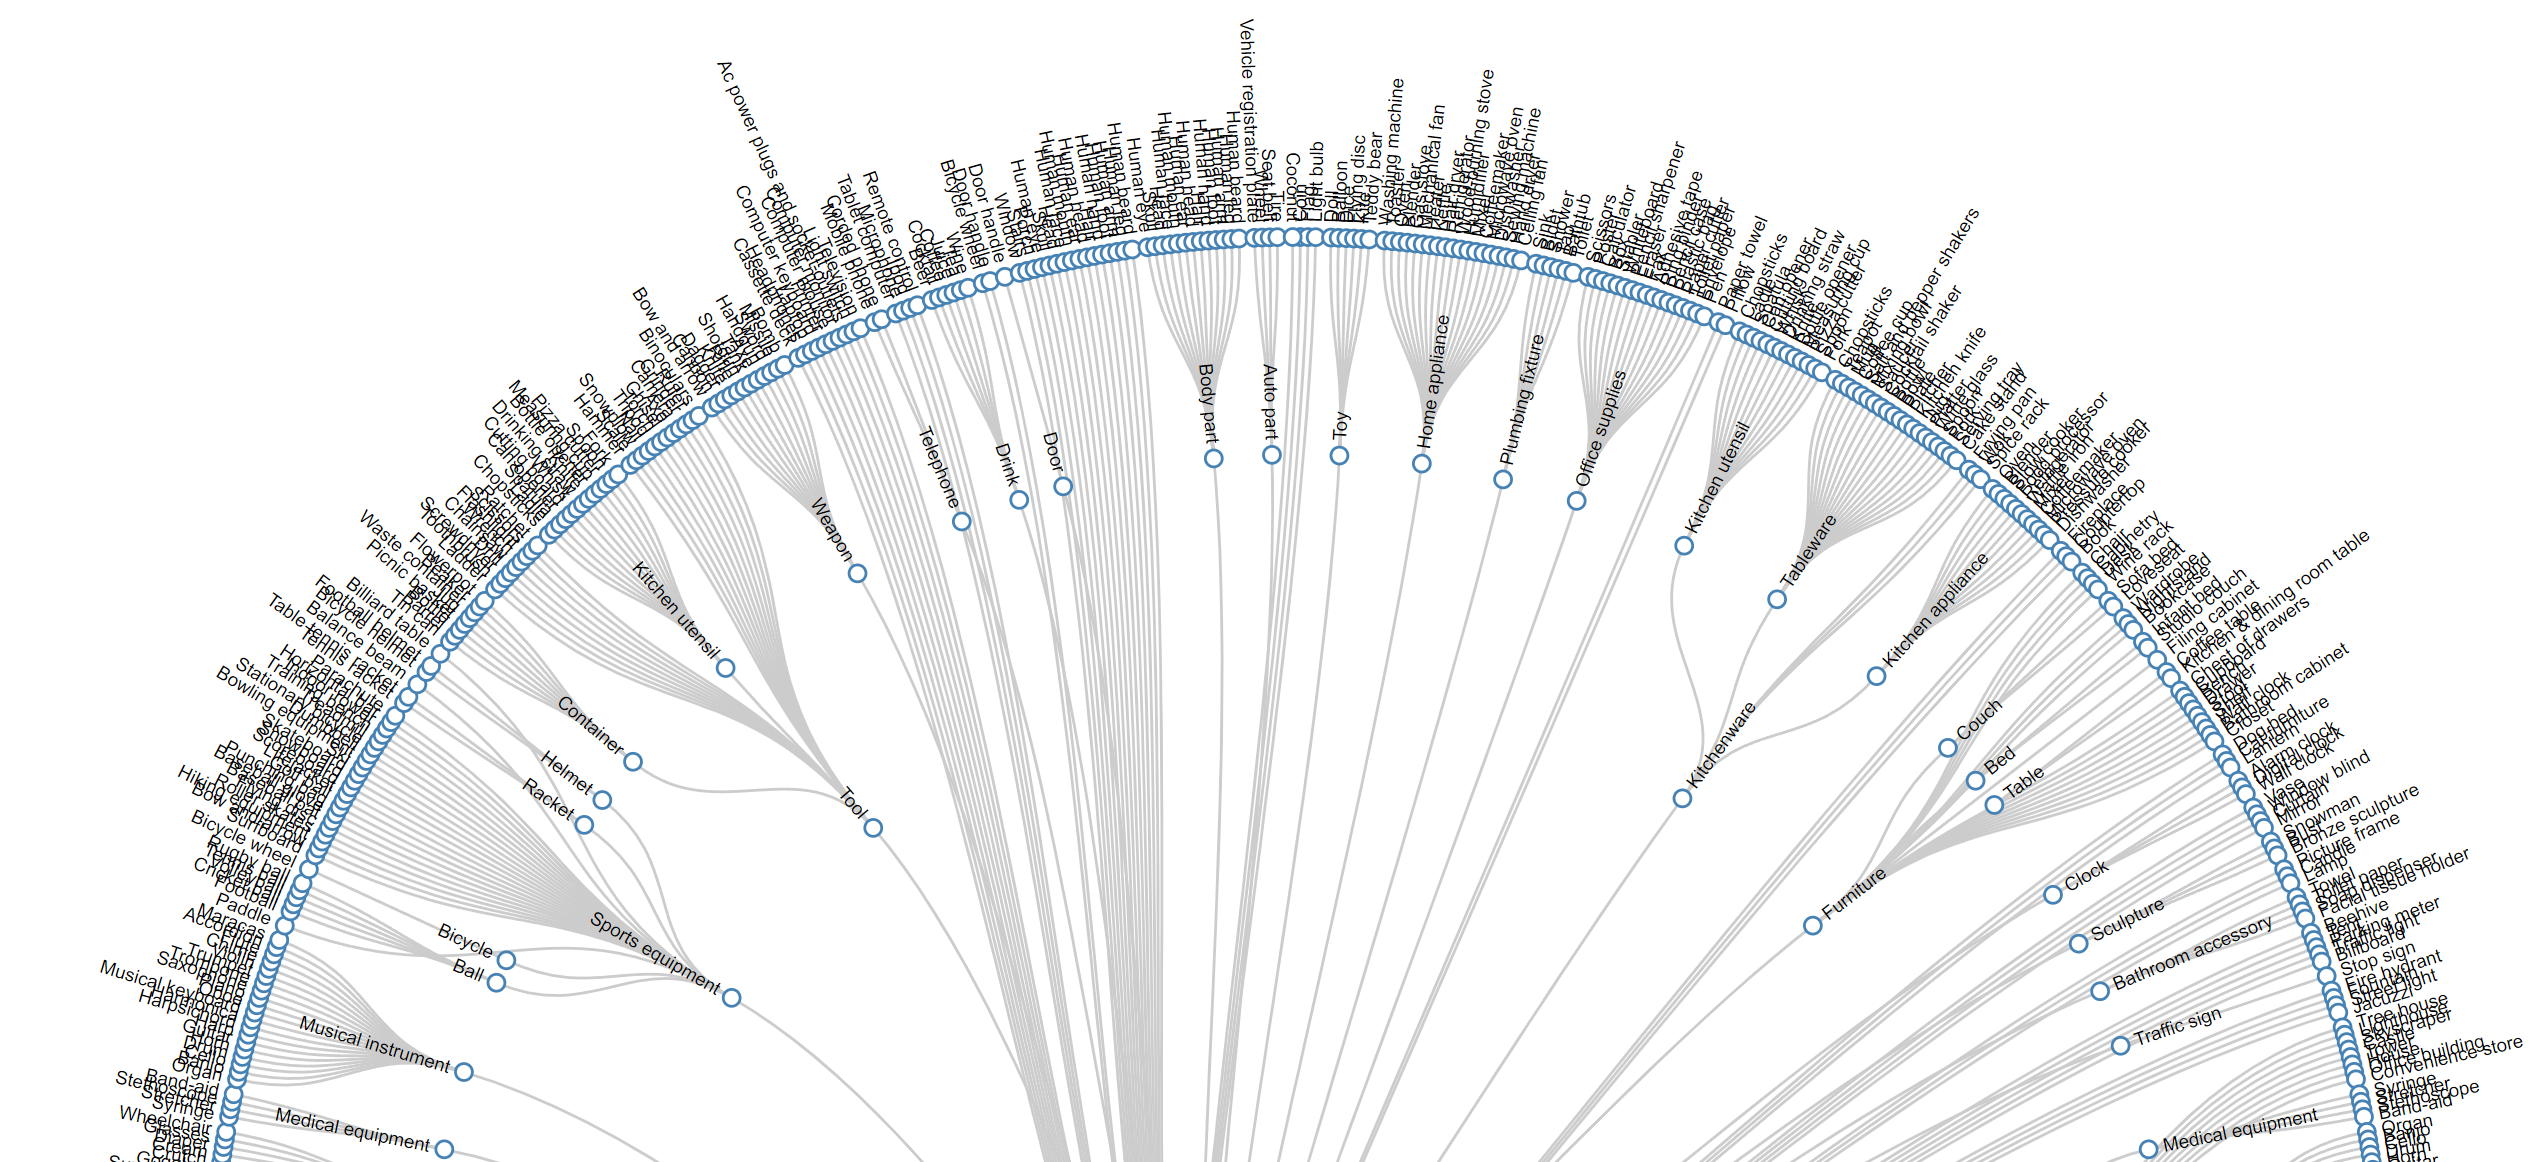

## `OIDv4_Toolkit`ni yuklab olish 

In [ ]:
# !git clone https://github.com/EscVM/OIDv4_ToolKit.git
# !cd OIDv4_ToolKit && pip install -r requirements.txt

`help`

In [28]:
# !cd OIDv4_ToolKit && python3 main.py -h

Biz bu loyihamiz uchun uch turdagi(`Avtomobil`, `Samalyot`, `Suv tranportlari(kema, qayiq)`) transportlarni klassifikatsiya qila oladigan model quramiz. Shuning uchun ham OIDv4_Toolkit yordamida har bir klass uchun `200` tadan rasm yuklab olamiz. 

In [4]:
# !cd OIDv4_ToolKit && python3 main.py downloader --Dataset /content --classes Car Airplane Boat  --type_csv train --limit 200 


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Car.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] y
...145%, 0 MB, 53685 KB/s, 0 seconds passed
[DOWNLOAD] | File clas

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

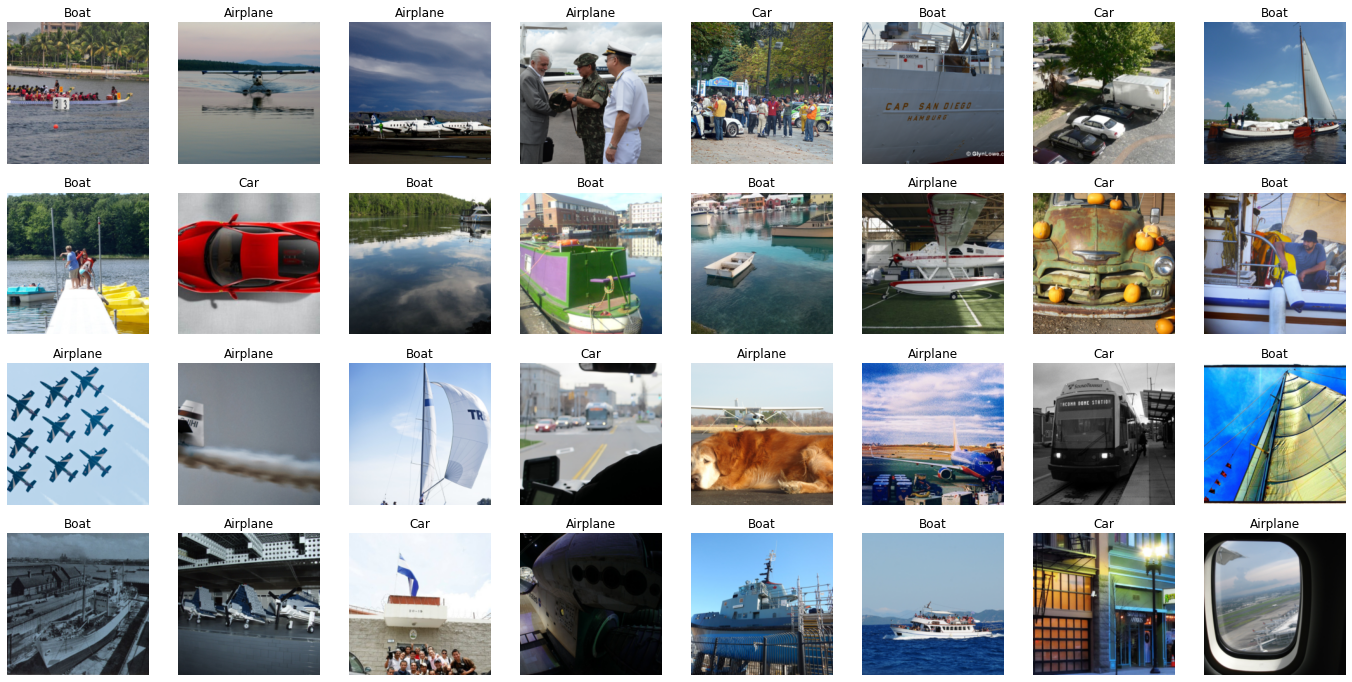

In [5]:
from fastai.vision.all import *
from ipywidgets import widgets

# # data path
# path = Path('train')


# fns = get_image_files(path)
# # failed = verify_images(fns)
# fns

# # Dataloader class
# transports = DataBlock(
#     blocks=(ImageBlock, CategoryBlock),
#     get_items = get_image_files,
#     splitter = RandomSplitter(valid_pct=0.2, seed=42),
#     get_y=parent_label, 
#     item_tfms=Resize(224)
#     )

# # dataloader object
# dls = transports.dataloaders(path) # data loaders

# # datasetni ko'rish
# dls.train.show_batch(max_n=32, nrows=4)

# # o'qitish (train)
# learn = cnn_learner(dls, resnet34, metrics=accuracy)
# learn.fine_tune(4)

## Modelni tekshirib ko'ramiz

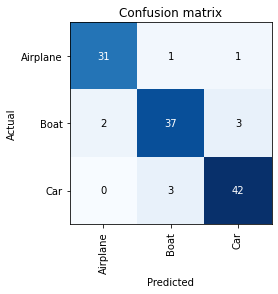

In [9]:
# interpretation
# interp = ClassificationInterpretation.from_learner(learn)
# interp.plot_confusion_matrix()

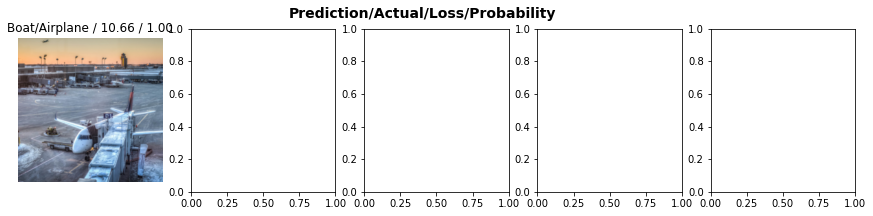

In [12]:
# interp.plot_top_losses(5, nrows=1)

In [7]:
# upload = widgets.FileUpload()
# upload

FileUpload(value={}, description='Upload')

Bashorat: Boat
Ehtimolligi: 100.0%


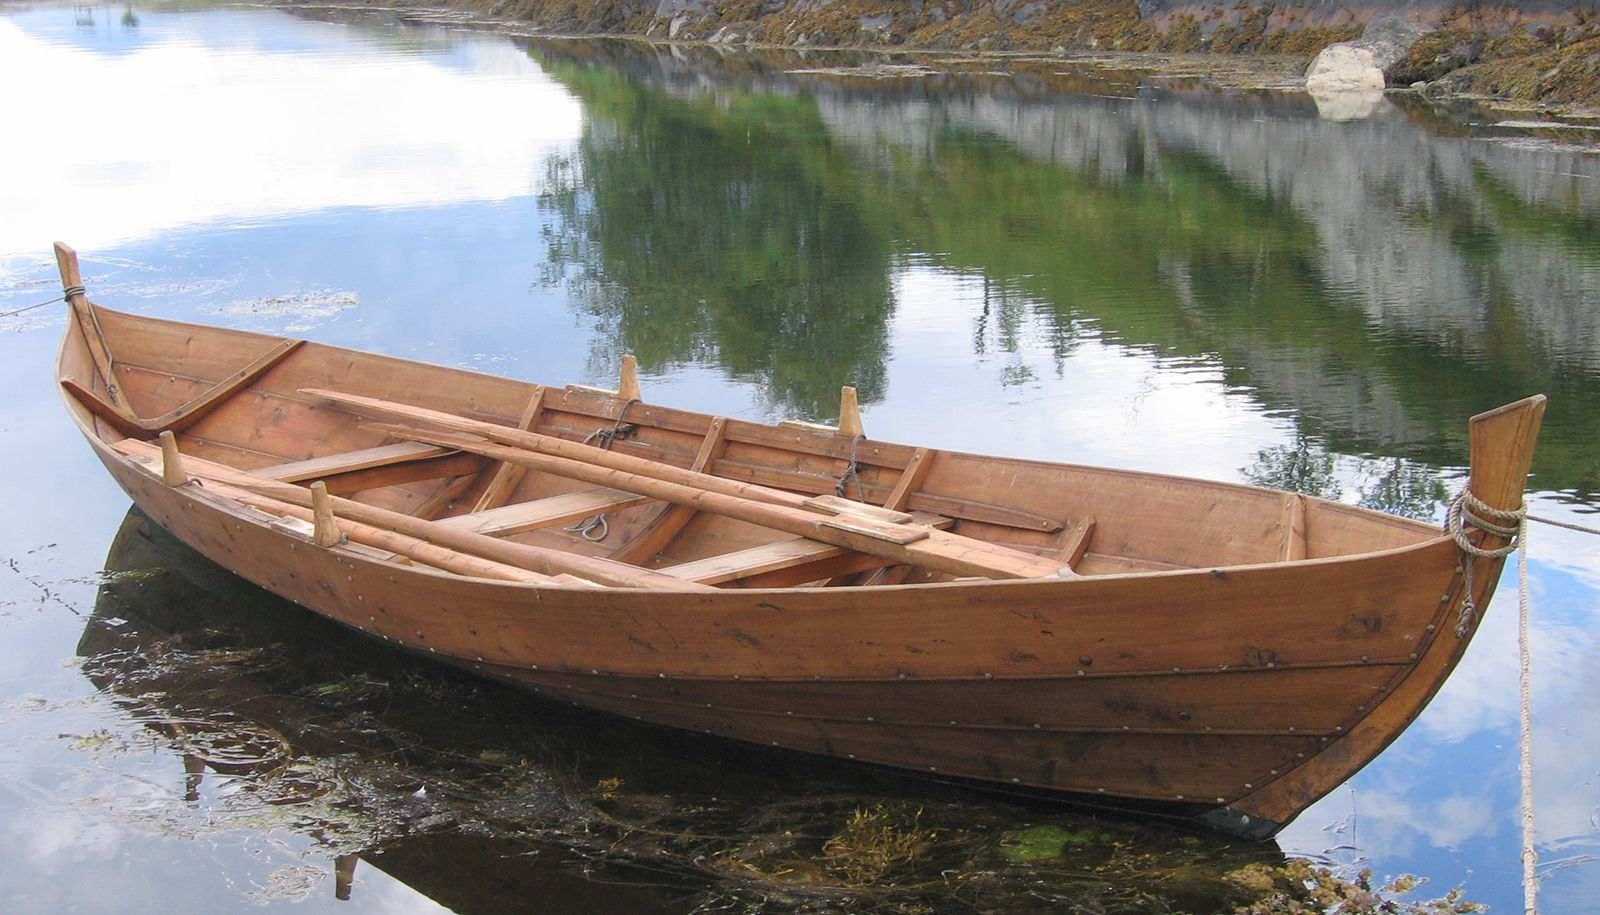

In [8]:
# img = PILImage.create(upload.data[-1])
# pred, pred_idx, prob=learn.predict(img)
# print(f'Bashorat: {pred}')
# print(f'Ehtimolligi: {prob[pred_idx]*100:.1f}%')
# img

## O'qitilgan modelimizni saqlab olamiz

In [ ]:
# learn.export('transport_prediction.pkl')

## O'qitilgan modelmizni yuklab olib tekshirib ko'ramiz

In [ ]:
model = load_learner('transport_prediction.pkl')
# model.predict(img)

In [ ]:
model.dls.vocab

# Modeldan mahsulotgacha

## Mahsulot yaratishimiz uchun:

- Ipython widgets
- Voila

Kutubxonalari kerak bo'ladi

In [26]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [28]:
img = PILImage.create(btn_upload.data[-1])
out = widgets.Output()
with out:
  display(img.to_thumb(224, 224))
out

Output()

In [43]:
pred, pred_idx, probs = model.predict(img)
label_pred = widgets.Label()
label_pred.value = f'Bashorat: {pred}; Ehtimolligi: {probs[pred_idx]*100:.1f}%'
label_pred

Label(value='Bashorat: Boat; Ehtimolligi: 100.0%')

In [44]:
classify = widgets.Button(description='Classify')
classify

Button(description='Classify', style=ButtonStyle())

In [45]:
def on_click_classify(change):
  img = PILImage.create(btn_upload.data[-1])
  out.clear_output()
  with out: display(img.to_thumb(224, 224))
  pred, pred_idx, probs = model.predict(img)
  label_pred.value = label_pred.value = f'Bashorat: {pred}; Ehtimolligi: {probs[pred_idx]*100:.1f}%'

In [46]:
classify.on_click(on_click_classify)

In [47]:
widgets.VBox([widgets.Label('Klassifikatsiya uchun rasmni tanlang'), btn_upload, classify, out, label_pred])

# Deploy qilish

In [48]:
!pip install voila
!jupyter serverextension enable voila --sys-prefix

     |████████████████████████████████| 1.7 MB 5.2 MB/s 
     |████████████████████████████████| 111 kB 40.4 MB/s 
     |████████████████████████████████| 130 kB 42.8 MB/s 
     |████████████████████████████████| 557 kB 48.2 MB/s 
     |████████████████████████████████| 397 kB 42.3 MB/s 
     |████████████████████████████████| 79 kB 7.0 MB/s 
     |████████████████████████████████| 428 kB 45.9 MB/s 
     |████████████████████████████████| 53 kB 1.9 MB/s 
  Attempting uninstall: tornado
    Found existing installation: tornado 5.1.1
    Uninstalling tornado-5.1.1:
      Successfully uninstalled tornado-5.1.1
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 5.3.5
    Uninstalling jupyter-client-5.3.5:
      Successfully uninstalled jupyter-client-5.3.5
  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 5.6.1
    Uninstalling nbconvert-5.6.1:
      Successfully uninstalled nbconvert-5.6.1
ERROR: pip's dependency resolver does

Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
Error loading server extension voila
      X is voila importable?
